In [1]:
#it is important that creditcard companies are able to recognize fraudlent credit card transaction
#the dataset contains transactions made by credit card
#the data set are already in a result of principal components obtained with PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
x=df.drop(['Amount','Class','Time'],axis=1)
x
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [7]:
y=df.loc[:,'Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.20,random_state=1)
testy.shape

(56962,)

In [9]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi=logi.fit(trainx,trainy)
print(trainx)

              V1        V2        V3        V4        V5        V6        V7  \
13367   1.387525 -0.547811  0.076422 -0.739334 -0.519887 -0.026007 -0.694673   
31788   1.021179 -0.194114  1.207791  1.738369 -0.659824  0.631864 -0.434168   
84796  -1.134453  0.636843  2.457241  1.317848  0.605755  0.143546  0.242076   
6243   -0.851343  0.062000  1.406917 -1.669375  0.462639 -0.150804  0.403887   
162432 -0.040314  0.545458  0.831788 -0.515723  0.128584 -0.112466  0.027800   
...          ...       ...       ...       ...       ...       ...       ...   
21440  -2.986845 -8.663978 -1.910863  0.664058 -3.934875  0.861269  1.647511   
117583  0.937083 -0.849673  0.524186 -0.020031 -0.606327  0.692302 -0.463724   
73349  -1.149963  1.696462  1.637114  2.658991 -0.021502  0.192287  0.205204   
267336  1.754554 -0.699398 -0.076332  0.443915 -0.672082  0.389061 -0.807534   
128037 -0.707635  0.493302  2.648089  1.064807 -0.680271  1.183838  0.169413   

              V8        V9       V10  .

In [10]:
ypre=logi.predict(testx)
print('ypredict:',ypre)


ypredict: [0 0 0 ... 0 0 0]


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
predicted_andoutput_accuracy=accuracy_score(ypre,testy)
print(predicted_andoutput_accuracy)

0.9991573329588147


In [12]:
predicted_andoutput_confusion=confusion_matrix(ypre,testy)
print(predicted_andoutput_confusion)

[[56865    38]
 [   10    49]]


In [13]:
predicted_andoutput_classsification=(classification_report(ypre,testy))
print(predicted_andoutput_classsification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56903
           1       0.56      0.83      0.67        59

    accuracy                           1.00     56962
   macro avg       0.78      0.91      0.84     56962
weighted avg       1.00      1.00      1.00     56962



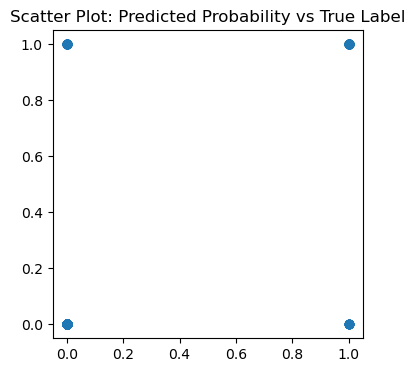

In [14]:
plt.figure(figsize=(4, 4))
plt.scatter(ypre,testy,)
plt.title('Scatter Plot: Predicted Probability vs True Label')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
clf.fit(trainx,trainy)
ypre2=clf.predict(testx)
print(ypre2)


[0 0 0 ... 0 0 0]


In [16]:
rpredicted_andoutput_confusion=confusion_matrix(ypre2,testy)
print(rpredicted_andoutput_confusion)

[[56869    24]
 [    6    63]]


In [17]:
rpredicted_andoutput_accuracy=accuracy_score(ypre2,testy)
print(rpredicted_andoutput_accuracy)

0.9994733330992591


In [18]:
rpredicted_andoutput_classification=classification_report(ypre2,testy)
print(rpredicted_andoutput_classification)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56893
           1       0.72      0.91      0.81        69

    accuracy                           1.00     56962
   macro avg       0.86      0.96      0.90     56962
weighted avg       1.00      1.00      1.00     56962



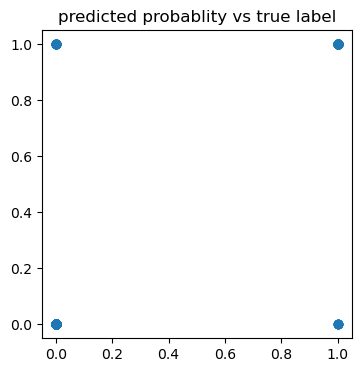

In [19]:
plt.figure(figsize=(4,4))
plt.title('predicted probablity vs true label')
plt.scatter(ypre2,testy)
plt.show()

In [20]:
clf=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=1)
clf.fit(trainx,trainy)
ypre4=clf.predict(testx)
print(ypre4)

[0 0 0 ... 0 0 0]


In [21]:
ra_predicted_andoutput_accuracy=accuracy_score(ypre4,testy)
print(ra_predicted_andoutput_accuracy)

0.9994733330992591


In [22]:
ra_predicted_andoutput_confusion=confusion_matrix(ypre4,testy)
print(ra_predicted_andoutput_confusion)

[[56869    24]
 [    6    63]]


In [23]:
ra_predicted_andoutput_classification=classification_report(ypre4,testy)
print(ra_predicted_andoutput_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56893
           1       0.72      0.91      0.81        69

    accuracy                           1.00     56962
   macro avg       0.86      0.96      0.90     56962
weighted avg       1.00      1.00      1.00     56962



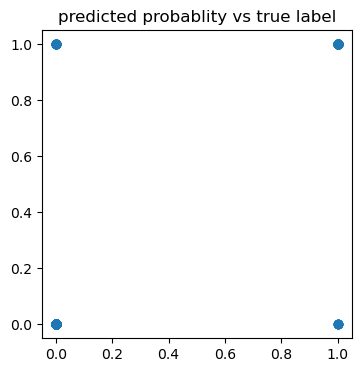

In [24]:
plt.figure(figsize=(4,4))
plt.title('predicted probablity vs true label')
plt.scatter(ypre4,testy)


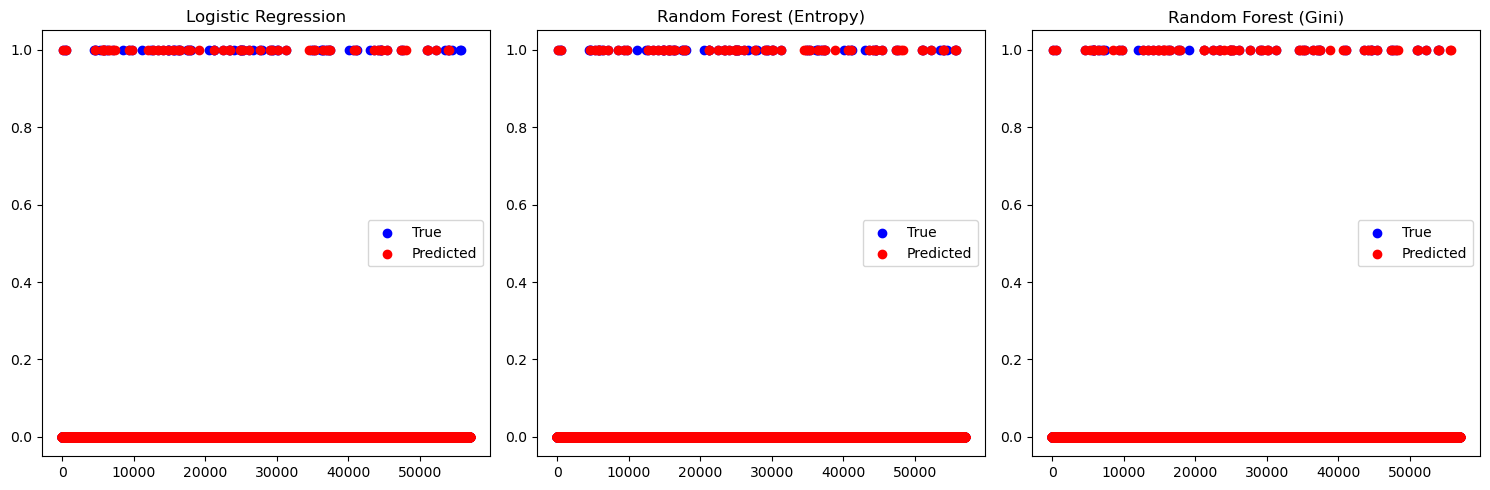

In [25]:
# Plot for Logistic Regression,Random forest (entropy),random forest(gini)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].scatter(np.arange(len(testy)), testy, color='b', label='True')
axes[0].scatter(np.arange(len(ypre)), ypre, color='r', label='Predicted')
axes[0].set_title('Logistic Regression')
axes[0].legend()
axes[1].scatter(np.arange(len(testy)), testy, color='b', label='True')
axes[1].scatter(np.arange(len(ypre4)), ypre4, color='r', label='Predicted')
axes[1].set_title('Random Forest (Entropy)')
axes[1].legend()
axes[2].scatter(np.arange(len(ypre)), ypre, color='b', label='True')
axes[2].scatter(np.arange(len(ypre4)), ypre4, color='r', label='Predicted')
axes[2].set_title('Random Forest (Gini)')
axes[2].legend()
plt.tight_layout()
plt.show()

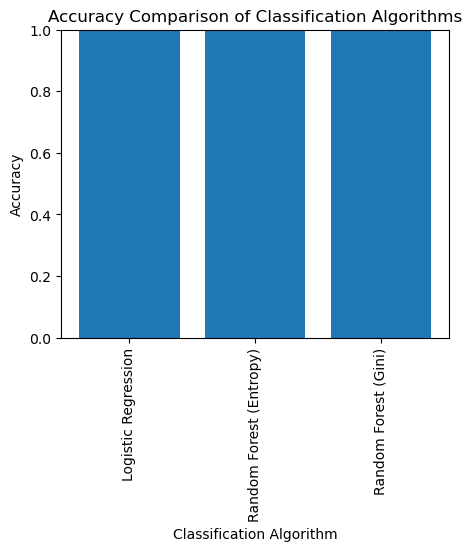

In [26]:
# Accuracy scores for Logistic Regression, Random Forest with entropy, and Random Forest with Gini
accuracies = [0.9991573329588147,0.9994733330992591 ,0.9994733330992591 ] 
labels = ['Logistic Regression', 'Random Forest (Entropy)', 'Random Forest (Gini)']
x = np.arange(len(labels))
plt.figure(figsize=(5,4))
plt.bar(x, accuracies)
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Algorithms')
plt.ylim([0, 1]) 
plt.show()

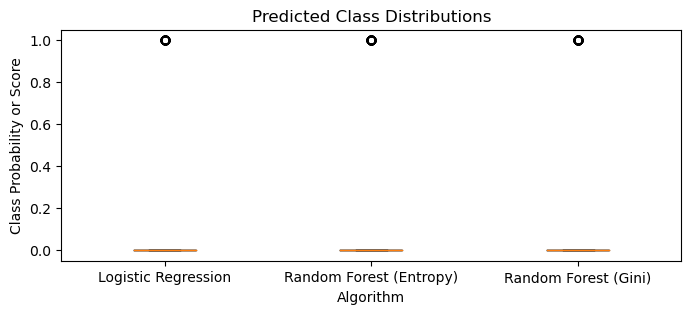

In [27]:
#box and whisker plot for logistic regression ,random forest(entropy)and random forest(gini)
algorithm_labels = ['Logistic Regression', 'Random Forest (Entropy)', 'Random Forest (Gini)']
all_predictions = [ypre, ypre2, ypre4]
plt.figure(figsize=(8,3))
plt.boxplot(all_predictions, labels=algorithm_labels)
plt.xlabel('Algorithm')
plt.ylabel('Class Probability or Score')
plt.title('Predicted Class Distributions')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
rgr=LinearRegression()
rgr.fit(trainx,trainy)

LinearRegression()

In [30]:
yprelin=rgr.predict(testx)


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse=mean_squared_error(yprelin,testy)
mse

0.0008200361233296626

In [33]:
rmse=np.sqrt(mse)
rmse

0.02863627286030189

In [34]:
score=rgr.score(trainx,trainy)
score

0.5341190153441073

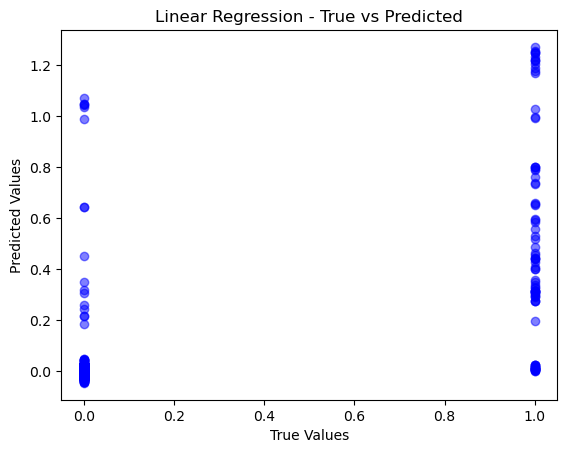

In [35]:
plt.scatter(testy, yprelin, color='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - True vs Predicted')
plt.show()